In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
import time
import random
from PIL import Image
import os
import torch

config_file = 'configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = 'laboro_tomato_big_48ep.pth'

#checkpoint_file = 'epoch_42.pth' # this file contain model weight and trained parameters

No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.3'


c:\Users\ASUS\miniconda3\envs\backend\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

1.12.0+cpu
False
None
False


AssertionError: Torch not compiled with CUDA enabled

In [3]:
# this cell is for save result image in the specific folder using all images and depth data in the specific folder

image_directory = r'D:\UOA2\2024Sem1\COMPSYS 700\p4p\All_image\Original'
save_directory = r'D:\UOA2\2024Sem1\COMPSYS 700\p4p\All_image\Result'

# Get all image and depth files.
image_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]
depth_files = [f for f in os.listdir(image_directory) if f.endswith('.npy')]

# ensure we have equal number of image file and depth file

assert len(image_files) == len(depth_files), "Mismatch in number of image and depth files"

for i in range(len(image_files)):
    imagePath = os.path.join(image_directory, image_files[i])
    depthPath = os.path.join(image_directory, depth_files[i])
    img = mmcv.imread(imagePath)
    model = init_detector(config_file, checkpoint_file, device='cpu') # initialize the object detection model on cpu
    depthData = np.load(depthPath) # load numpy array
    result = inference_detector(model, img) # to perform object detection inference on input image using initialized model. i
    # it will return detection result which include bounding box coordinate and segmentation mask.
    # show_result_pyplot(model, img, result)

    bbox_result, segm_result = result

    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32) for i, bbox in enumerate(bbox_result)
    ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(bbox_result)
    
    if segm_result:
        segm_result = [x for x in segm_result if x != []]
        if segm_result:
            segment = np.vstack(segm_result)
        else:
            segment = np.array([])
    else:
        segment = np.array([])

    # segm_result = [x for x in segm_result if x != []]
    # segment = np.vstack(segm_result)

    result_num = i

    out_file=f'{save_directory}/result_{result_num+1}.png'
    print(bboxes)
    model.show_result(img, result, out_file=out_file)



load checkpoint from local path: laboro_tomato_big_48ep.pth


d:\UOA2\2024Sem1\COMPSYS 700\p4p\main\Project 22_ Plant monitoring system for Smart Farm_\Compendium Andy\mmdetection\mmdet\datasets\utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


[[5.26906555e+02 2.03808838e+02 7.18393127e+02 4.28897949e+02
  9.76614892e-01]
 [1.04240625e+03 5.94593323e+02 1.09889417e+03 6.42505432e+02
  4.41825330e-01]
 [7.72594421e+02 2.12499268e+02 9.68646545e+02 4.16526001e+02
  3.67241472e-01]
 [7.09877075e+02 2.98480377e+02 8.05223206e+02 4.11897308e+02
  2.34994084e-01]
 [1.11488562e+03 6.00468689e+02 1.18366699e+03 6.62014648e+02
  1.31936818e-01]
 [1.06223511e+03 6.16811401e+02 1.12459790e+03 6.98307068e+02
  8.58525857e-02]
 [2.05081606e+00 4.33329407e+02 4.80905075e+01 5.01062012e+02
  9.92281497e-01]
 [6.93731201e+02 4.06365997e+02 8.77035767e+02 5.71975586e+02
  9.89438593e-01]
 [1.06201416e+03 6.20543640e+02 1.12627234e+03 6.96102844e+02
  9.80349183e-01]
 [7.78177490e+02 2.14266510e+02 9.65718994e+02 4.17088715e+02
  9.76818442e-01]
 [4.87048706e+02 4.75916077e+02 5.25604614e+02 5.05130646e+02
  9.64829981e-01]
 [1.11725867e+03 6.01090576e+02 1.18309338e+03 6.62552002e+02
  9.44176853e-01]
 [2.64685883e+02 4.40574371e+02 2.995645

load checkpoint from local path: laboro_tomato_big_48ep.pth


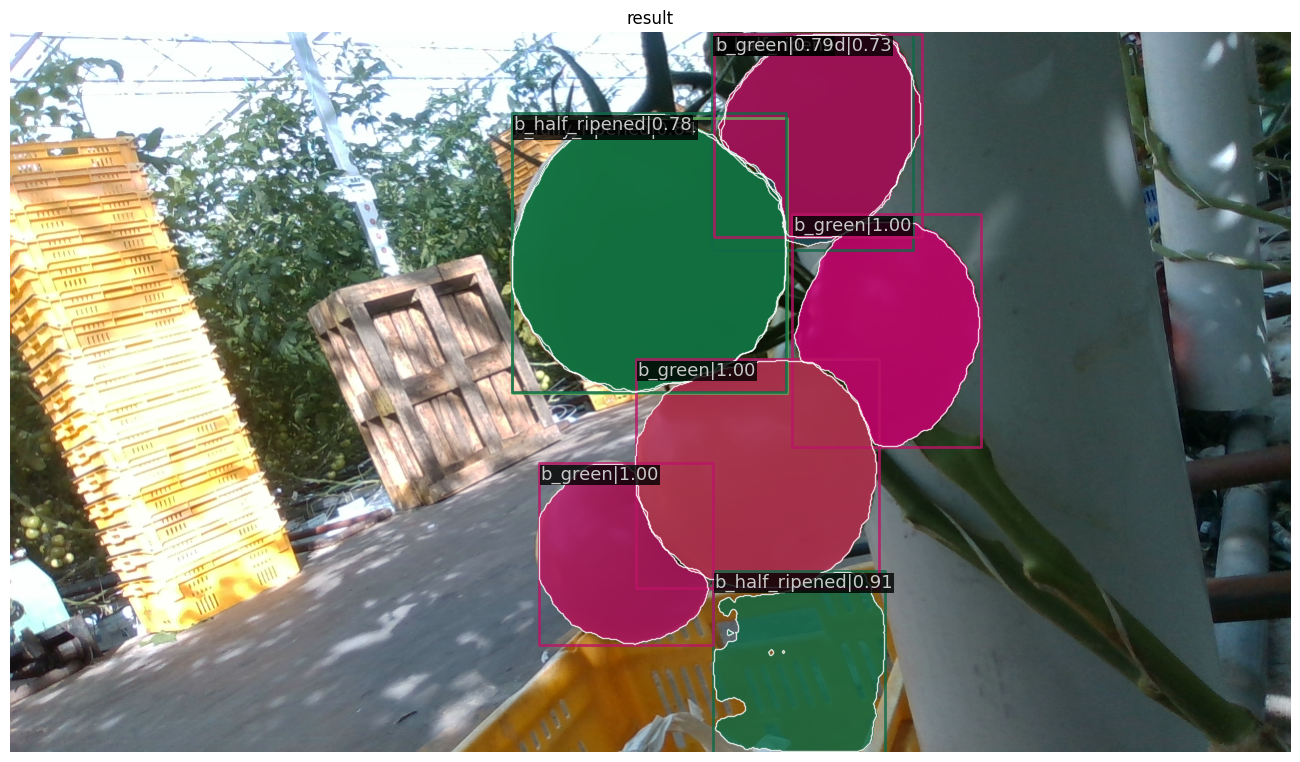

In [11]:
# imagePath = 'lightedImages/angle1/2.png' # image file
# depthPath = 'lightedImages/angle1/2.npy' # numpy file for depth image
# imagePath = 'newImages/41_color.png'# not 33,34,35,36
# depthPath = 'newImages/41_depthData.npy'
image_directory = r'D:\UOA2\2024Sem1\COMPSYS 700\p4p\All_image\Original'
save_directory = r'D:\UOA2\2024Sem1\COMPSYS 700\p4p\All_image\Result'
# imagePath = r'D:\UOA2\2024Sem1\COMPSYS 700\DataGet\20240530_123818 color.png'
# depthPath = r'D:\UOA2\2024Sem1\COMPSYS 700\DataGet\20240530_123818 depthData.npy'

imagePath = r'D:\UOA2\2024Sem1\COMPSYS 700\DataGet\20240530_123823 color.png'
depthPath = r'D:\UOA2\2024Sem1\COMPSYS 700\DataGet\20240530_123823 depthData.npy'
# for i in range (1,100):
#     if os.path.isfile(f'{i}_color.png') == False:
#         imagePath = f'D:/UOA2/p4p/newdownload/Project 22_ Plant monitoring system for Smart Farm_/Compendium Andy/mmdetection/lightedImages/angle1/{i}.png'
#         depthPath = f'D:/UOA2/p4p/newdownload/Project 22_ Plant monitoring system for Smart Farm_/Compendium Andy/mmdetection/lightedImages/angle1/{i}.npy'
#         break

# build the model from a config file and a checkpoint file
img = mmcv.imread(imagePath)
model = init_detector(config_file, checkpoint_file, device='cpu') # initialize the object detection model on cpu
depthData = np.load(depthPath) # load numpy array
result = inference_detector(model, img) # to perform object detection inference on input image using initialized model. i
# it will return detection result which include bounding box coordinate and segmentation mask.
show_result_pyplot(model, img, result)

bbox_result, segm_result = result

labels = [
    np.full(bbox.shape[0], i, dtype=np.int32)\
    for i, bbox in enumerate(bbox_result)
]
labels = np.concatenate(labels)
bboxes = np.vstack(bbox_result)

segm_result = [x for x in segm_result if x != []]
segment = np.vstack(segm_result)

result_num = 1

# out_file=f'{save_directory}/result_{result_num}.png'
# print(bboxes)
model.show_result(img, result, out_file='result_60.png')

8


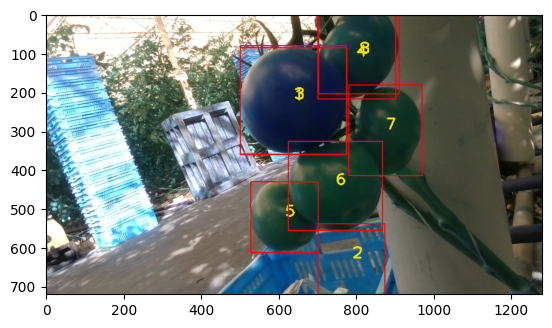

In [12]:
import cv2

x = cv2.imread(imagePath, cv2.IMREAD_COLOR)
count = 0
for bbox in bboxes:
    if bbox[4] > 0.67:
        count += 1  # for each high-confidence bounding box, this line draws a blue rectangle around the detected object. The rectangle is defined using the top-left and bottom-right corner coordinates from the bounding box. 
        x = cv2.rectangle(x, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2) 
        cv2.putText(x, str(count), (int((int(bbox[0]) + int(bbox[2]))/2), int((int(bbox[1]) + int(bbox[3]))/2)), fontFace = cv2.FONT_HERSHEY_PLAIN, fontScale = 3, thickness = 3, color = (250,225,0))
        #This line adds a text label to the center of the bounding box. The text includes the value of the count variable, which represents the order of detection.
        
cv2.imwrite('lightedImages/angle2/order44.png', x)
plt.imshow(x)
print(count)

In [13]:
import pyrealsense2 as rs
color_intrin = rs.pyrealsense2.intrinsics() #create a color intrinsics property
color_intrin.width = 1280
color_intrin.height = 720
color_intrin.ppx = 646.9525146484375 # set the principal point of the image. The principal point represents the center of the image in pixel coordinates
color_intrin.ppy = 375.3297119140625
color_intrin.fx = 911.9494018554688 #set the focal length of the camera along the X and Y axes. 
color_intrin.fy = 912.0560302734375
color_intrin.model = rs.pyrealsense2.distortion.inverse_brown_conrady
color_intrin.coeffs = [0.0, 0.0, 0.0, 0.0, 0.0]

In [14]:
from math import sqrt
 
# Function to find the circle on
# which the given three points lie
def findCircle(x1, y1, x2, y2, x3, y3) :
    x12 = x1 - x2;
    x13 = x1 - x3;
 
    y12 = y1 - y2;
    y13 = y1 - y3;
 
    y31 = y3 - y1;
    y21 = y2 - y1;
 
    x31 = x3 - x1;
    x21 = x2 - x1;
 
    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2);
 
    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2);
 
    sx21 = pow(x2, 2) - pow(x1, 2);
    sy21 = pow(y2, 2) - pow(y1, 2);
 
    # calculate coefficient f and g that used to determine the center or circle.
    f = (((sx13) * (x12) + (sy13) *
          (x12) + (sx21) * (x13) +
          (sy21) * (x13)) // (2 *
          ((y31) * (x12) - (y21) * (x13))));
             
    g = (((sx13) * (y12) + (sy13) * (y12) +
          (sx21) * (y13) + (sy21) * (y13)) //
          (2 * ((x31) * (y12) - (x21) * (y13))));
    
    # used for equation of circle
    c = (-pow(x1, 2) - pow(y1, 2) -
         2 * g * x1 - 2 * f * y1);
 
    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    h = -g;
    k = -f;
    sqr_of_r = h * h + k * k - c;
 
    # r is the radius
    r = round(sqrt(sqr_of_r), 5);
 
    #print("Centre = (", h, ", ", k, ")");
    #print("Radius = ", r);
    return r, [h,k]

In [15]:
import math
from scipy.ndimage import convolve
from PIL import Image, ImageFilter
from numpy import median

# THIS FUNCTION CALCULATES THE TOMATO SIZE USING THE BOUNDING BOXES, SEGMENTATION AND DEPTHDATA #
# RETURNS A LIST OF SIZES AND CORRESPONDING LIST OF fill percentage - higher THE percentage, THE MORE ACCURATE THE SIZE MEASUREMENT #

def calculateSize(bboxes, segment, depthData):
    heightList = []
    widthList = []
    fillPercentageList = []
    count = 0
    
    for bbox in bboxes:
        if bbox[4] > 0.7:  #This loop iterates through the list of bounding boxes. If the confidence score of the detected object (the fifth element bbox[4]) is greater than 0.7 (70%), the code proceeds to process that object.
            ### FIND EDGE DEPTH ###
            mask = np.asarray(segment[count], dtype="uint8") #get corresponding segmentation mask as binary matrix

            fil = [[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]]

            output = np.where(convolve(mask,fil, mode='constant') > 0)

            edgeDepth = []

            for length in range(len(output[0])):
                edgeDepth.append(depthData[output[0][length]][output[1][length]])

            centerDepth = median(edgeDepth)

            ### CIRCLE FITTING ###
            radiusList = []
            centerList = []

            for i in range(10000): #sample 3 random points and generate a circle
                randomList = random.sample(range(0, len(output[0])), 3)
                firstPoint = randomList[0]
                secondPoint = randomList[1]
                thirdPoint = randomList[2]
                try:
                    radius, center = findCircle(output[1][firstPoint], output[0][firstPoint], output[1][secondPoint], output[0][secondPoint], output[1][thirdPoint], output[0][thirdPoint])
                    radiusList.append(radius)
                    centerList.append(center)
                except ZeroDivisionError:
                    continue

            medianRadius = int(median(radiusList) + 0.5)

            xList = []
            yList = []

            for i in range(len(radiusList)):
                xList.append(centerList[i][0])
                yList.append(centerList[i][1])

            xMedian = int(median(xList) + 0.5) #center coordinates
            yMedian = int(median(yList) + 0.5) #center coordinates

            ### CALCULATE SIZE ###
            xMin = int(bbox[0])
            xMax = int(bbox[2])
            yMin = int(bbox[1])
            yMax = int(bbox[3])
            xMid = int((xMin + xMax)/2)
            yMid = int((yMin + yMax)/2)

            top = [xMid, yMin]
            bot = [xMid, yMax]
            left = [xMin, yMid]
            right = [xMax, yMid]
            topC = rs.rs2_deproject_pixel_to_point(color_intrin, top, centerDepth)
            botC = rs.rs2_deproject_pixel_to_point(color_intrin, bot, centerDepth)
            leftC = rs.rs2_deproject_pixel_to_point(color_intrin, left, centerDepth)
            rightC = rs.rs2_deproject_pixel_to_point(color_intrin, right, centerDepth)

            new_height = math.sqrt(math.pow(topC[0] - botC[0], 2) + math.pow(topC[1] - botC[1],2) + math.pow(topC[2] - botC[2], 2))*100
            new_width = math.sqrt(math.pow(leftC[0] - rightC[0], 2) + math.pow(leftC[1] - rightC[1],2) + math.pow(leftC[2] - rightC[2], 2))*100

            heightList.append(new_height*100)
            widthList.append(new_width*100)
            
            ### calculate how much the segmentation mask fills up the drawn circle ###
            maskPixelsInsideCircle = 0
            totalMaskPixels = 0

            nonZero = np.transpose(np.nonzero(mask))

            for length in range(len(nonZero)):
                totalMaskPixels += 1
                if (((yMedian - nonZero[length][0])**2 + (xMedian - nonZero[length][1])**2) > medianRadius**2):
                    continue
                else:
                    maskPixelsInsideCircle += 1
            circleArea = int(math.pi * medianRadius**2)
            fillPercentage = maskPixelsInsideCircle / circleArea
            fillPercentageList.append(fillPercentage)
            
        count = count + 1
        
    return heightList, widthList, fillPercentageList


In [16]:
heightList, widthList, fillPercentageList= calculateSize(bboxes, segment, depthData)
print(heightList)
print(widthList)
print(type(heightList))
print(fillPercentageList)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24796\3712778758.py:28: RuntimeWarning: divide by zero encountered in scalar floor_divide
  f = (((sx13) * (x12) + (sy13) *
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24796\3712778758.py:33: RuntimeWarning: divide by zero encountered in scalar floor_divide
  g = (((sx13) * (y12) + (sy13) * (y12) +


[768.8672700896859, 1760.275512933731, 780.0508383661509, 603.9102748036385, 520.8232440054417, 645.2783197164536, 679.5415934175253, 567.5638094544411]
[768.9572125673294, 1672.9437187314034, 766.1610096693039, 562.0378348976374, 497.98816442489624, 684.8077569156885, 551.280565559864, 581.6112458705902]
<class 'list'>
[0.9800556271623363, 0.8999807803190467, 0.9787724811125226, 0.9124656126744225, 0.8093195390697283, 0.9643441354613378, 0.9001690364919956, 0.9259553876238772]


8
[0.98  0.9   0.979 0.912 0.809 0.964 0.9   0.926]


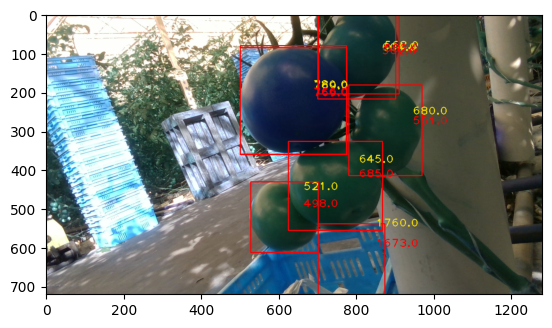

In [17]:
import cv2
heightList2 = np.round(heightList, 0)
widthList2 = np.round(widthList, 0)
fillPercentageList2 = np.round(fillPercentageList, 3)

y = cv2.imread(imagePath, cv2.IMREAD_COLOR)
count = 0
for bbox in bboxes:
    if bbox[4] > 0.67:
        count += 1  # for each high-confidence bounding box, this line draws a blue rectangle around the detected object. The rectangle is defined using the top-left and bottom-right corner coordinates from the bounding box. 
        y = cv2.rectangle(y, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2) 
        cv2.putText(y, str(heightList2[count -1]), (int((int(bbox[0]) + int(bbox[2]))/1.85), int((int(bbox[1]) + int(bbox[3]))/2.3)), fontFace = cv2.FONT_HERSHEY_PLAIN, fontScale = 2, thickness = 2, color = (250,225,0))
        # y = cv2.rectangle(y, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2) 
        cv2.putText(y, str(widthList2[count -1]), (int((int(bbox[0]) + int(bbox[2]))/1.85), int((int(bbox[1]) + int(bbox[3]))/2.1)), fontFace = cv2.FONT_HERSHEY_PLAIN, fontScale = 2, thickness = 2, color = (255,0,0))
        #This line adds a text label to the center of the bounding box. The text includes the value of the count variable, which represents the order of detection.
        
cv2.imwrite('lightedImages/angle2/size_44.png', y)
plt.imshow(y)
print(count)
print(fillPercentageList2)

In [150]:
# import cv2
# 
# x = cv2.imread(imagePath, cv2.IMREAD_COLOR)
# count = 0
# for bbox in bboxes:
#     if bbox[4] > 0.67:
#         count += 1  # for each high-confidence bounding box, this line draws a blue rectangle around the detected object. The rectangle is defined using the top-left and bottom-right corner coordinates from the bounding box. 
#         x = cv2.rectangle(x, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2) 
#         cv2.putText(x, str(count), (int((int(bbox[0]) + int(bbox[2]))/2), int((int(bbox[1]) + int(bbox[3]))/2)), fontFace = cv2.FONT_HERSHEY_PLAIN, fontScale = 2, thickness = 2, color = (250,225,0))
#         cv2.putText(x, str(fillPercentageList2[count -1]), (int((int(bbox[0]) + int(bbox[2]))/2), int((int(bbox[1]) + int(bbox[3]))/1.5)), fontFace = cv2.FONT_HERSHEY_PLAIN, fontScale = 2, thickness = 2, color = (255,0,0))
#         #This line adds a text label to the center of the bounding box. The text includes the value of the count variable, which represents the order of detection.
#         
# cv2.imwrite('lightedImages/angle2/order44.png', x)
# plt.imshow(x)
# print(count)
# print(fillPercentageList2)

In [ ]:
# calcaulate f1 score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

